In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [2]:
hdu = fits.open('DESI_HETDEX_SPEC_v1.6.fits')

In [3]:
hdu.info()

Filename: DESI_HETDEX_SPEC_v1.6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  INFO          1 BinTableHDU    105   2374R x 34C   [K, D, D, J, E, E, E, K, E, J, 10A, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  HETDEX_WAVE    1 ImageHDU         8   (1036,)   float32   
  3  HETDEX_SPEC    1 ImageHDU        10   (1036, 2374)   float32   
  4  HETDEX_SPEC_ERR    1 ImageHDU         9   (1036, 2374)   float32   
  5  DESI_WAVE     1 ImageHDU         8   (7781,)   float64   
  6  DESI_WAVE_VACUUM    1 ImageHDU         8   (7781,)   float64   
  7  DESI_SPEC     1 ImageHDU         9   (7781, 2374)   float32   
  8  DESI_SPEC_ERR    1 ImageHDU         9   (7781, 2374)   float32   


In [4]:
info_tab = Table(hdu['INFO'].data)

In [5]:
desi_wave = hdu['DESI_WAVE'].data
desi_spec = hdu['DESI_SPEC'].data
desi_spec_err = hdu['DESI_SPEC_ERR'].data

hetdex_wave = hdu['HETDEX_WAVE'].data
hetdex_spec = hdu['HETDEX_SPEC'].data
hetdex_spec_err = hdu['HETDEX_SPEC_ERR'].data

In [6]:
# pick random row to plot where the VI_quality is good
index_qual_lae = np.where( (info_tab['VI_Z'] > 1.88) & (info_tab['VI_QUALITY']>=3))[0]

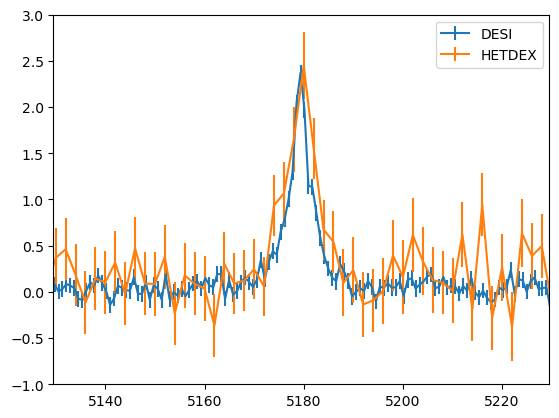

In [7]:
rand_index = index_qual_lae[121]

plt.figure()
wave_obj = info_tab['WAVE_HETDEX'][rand_index]

plt.errorbar( desi_wave, desi_spec[rand_index], yerr=desi_spec_err[rand_index], label='DESI')
plt.errorbar( hetdex_wave, hetdex_spec[rand_index], yerr=hetdex_spec_err[rand_index], label='HETDEX')

plt.xlim(wave_obj-50, wave_obj+50)
plt.ylim(-1, 3)
plt.legend()